In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [74]:
df = pd.read_csv("https://raw.githubusercontent.com/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/main/train_numerical.csv")

In [73]:
numericalFeatures = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

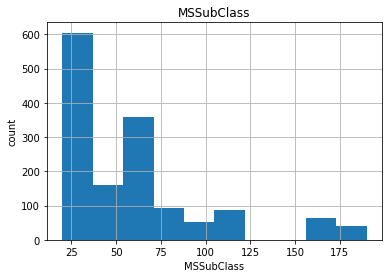

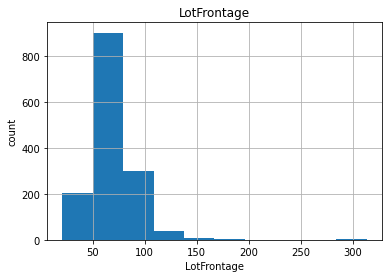

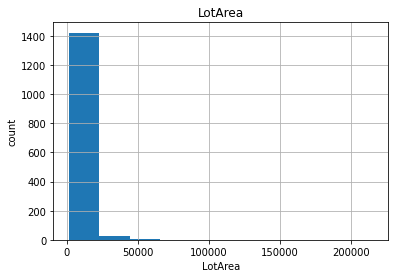

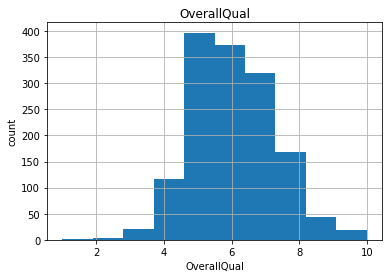

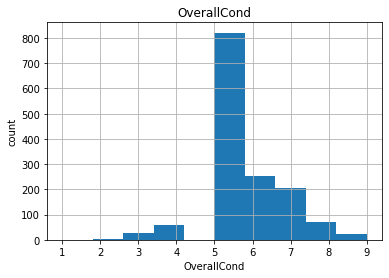

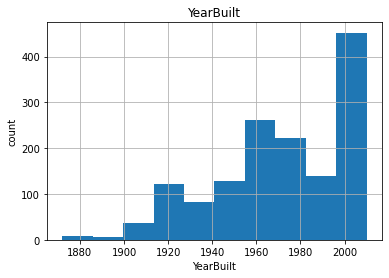

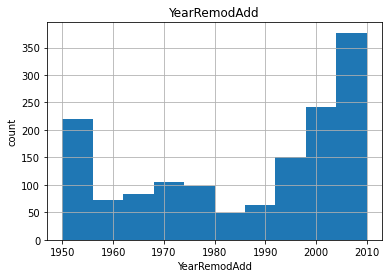

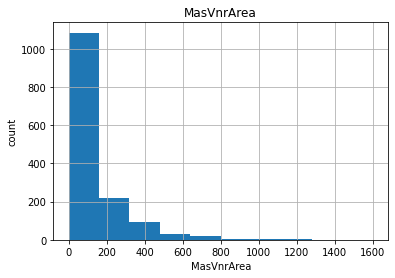

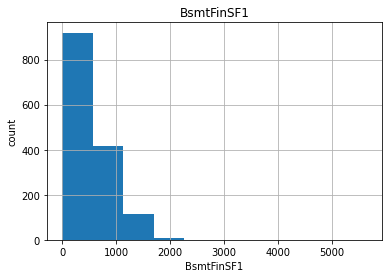

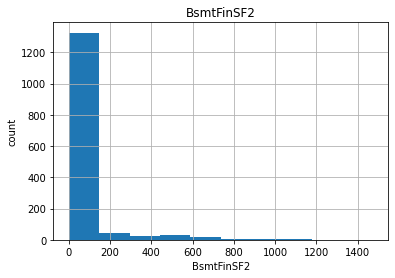

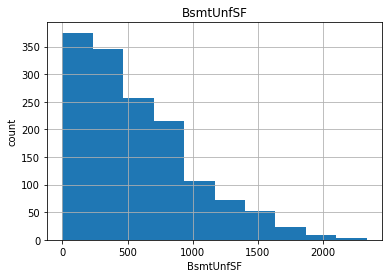

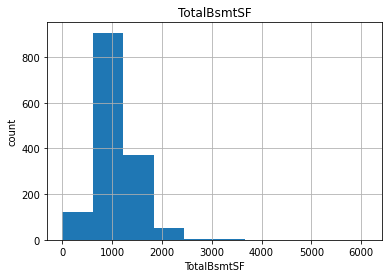

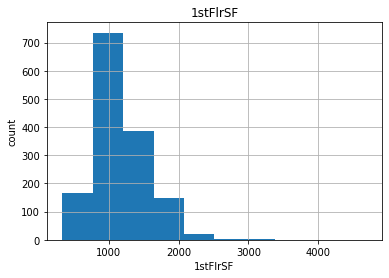

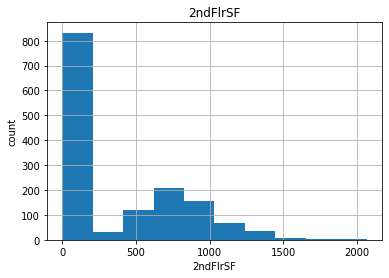

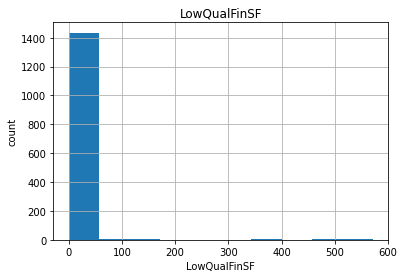

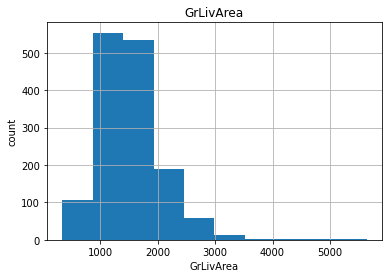

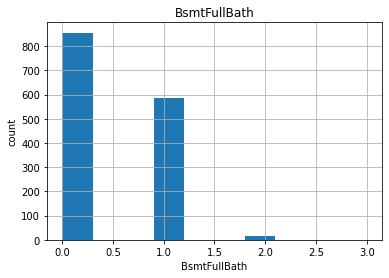

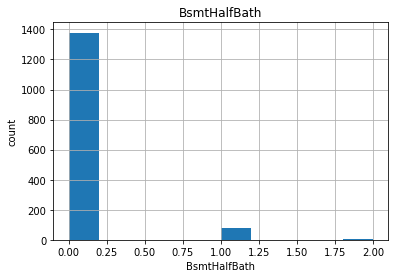

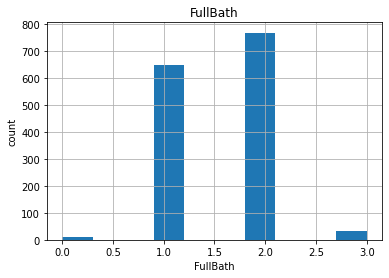

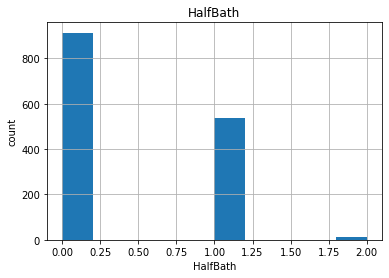

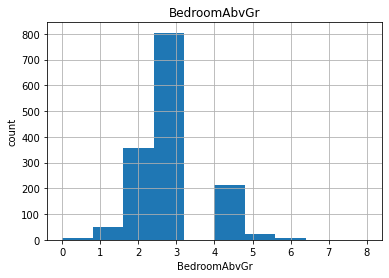

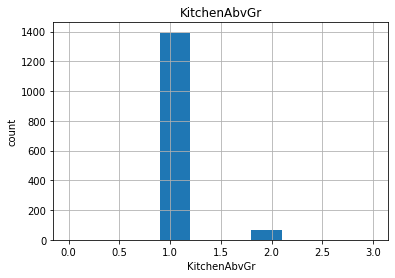

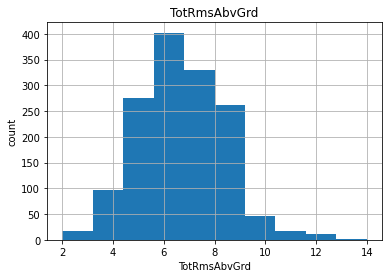

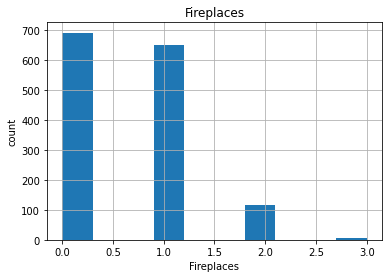

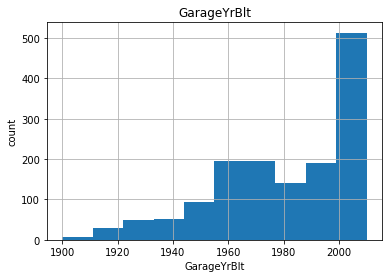

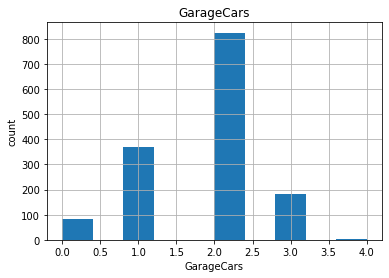

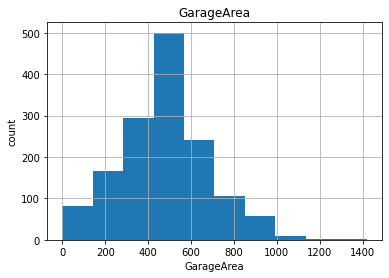

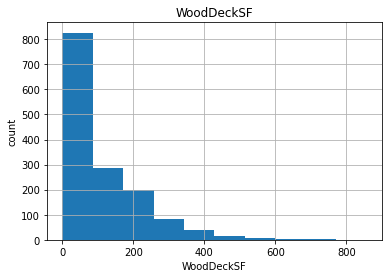

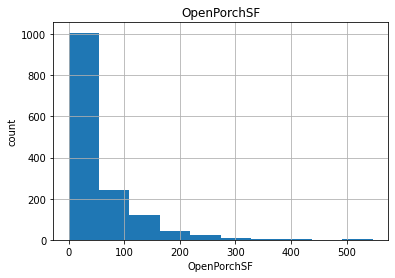

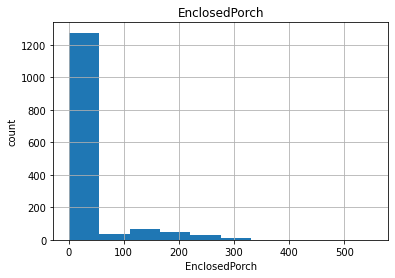

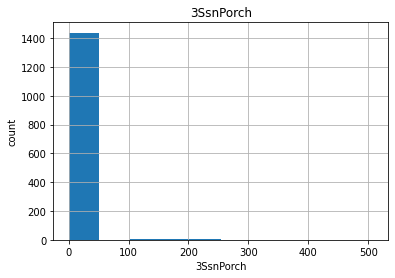

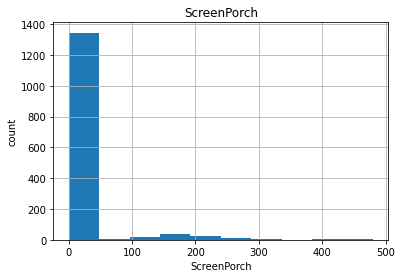

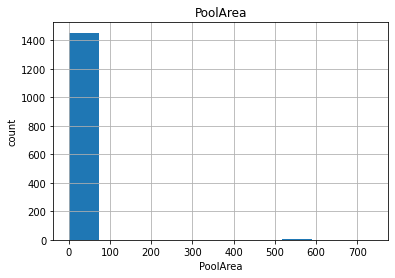

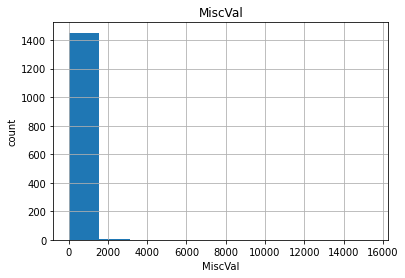

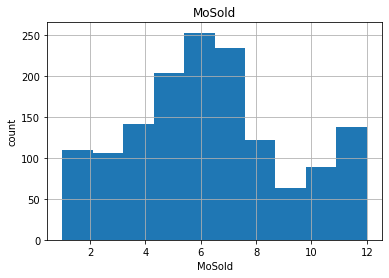

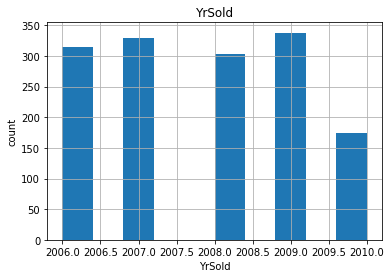

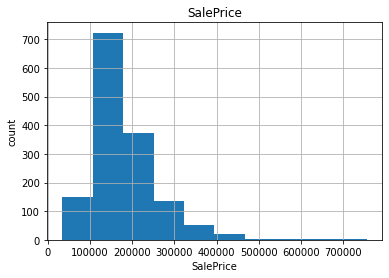

In [53]:
for feature in numericalFeatures:
    data=df.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

## **Converting to Normal distribution**

In [78]:
df_nd = df

In [79]:
df_nd[numericalFeatures]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.094345,4.174387,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,-inf,5.010635,6.752270,6.752270,6.749931,-inf,7.444249,0.0,-inf,0.693147,0.0,1.098612,0.0,2.079442,-inf,7.602401,0.693147,6.306275,-inf,4.110874,-inf,-inf,-inf,-inf,-inf,0.693147,7.604894,12.247694
1,2.995732,4.382027,9.169518,1.791759,2.079442,7.588830,7.588830,-inf,6.885510,-inf,5.648974,7.140453,7.140453,-inf,-inf,7.140453,-inf,0.0,0.693147,-inf,1.098612,0.0,1.791759,0.000000,7.588830,0.693147,6.131226,5.697093,-inf,-inf,-inf,-inf,-inf,-inf,1.609438,7.604396,12.109011
2,4.094345,4.219508,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,-inf,6.073045,6.824374,6.824374,6.763885,-inf,7.487734,0.0,-inf,0.693147,0.0,1.098612,0.0,1.791759,0.000000,7.601402,0.693147,6.410175,-inf,3.737670,-inf,-inf,-inf,-inf,-inf,2.197225,7.604894,12.317167
3,4.248495,4.094345,9.164296,1.945910,1.609438,7.557473,7.585789,-inf,5.375278,-inf,6.291569,6.628041,6.867974,6.628041,-inf,7.448334,0.0,-inf,0.000000,-inf,1.098612,0.0,1.945910,0.000000,7.599902,1.098612,6.464588,-inf,3.555348,5.605802,-inf,-inf,-inf,-inf,0.693147,7.603898,11.849398
4,4.094345,4.430817,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,-inf,6.194405,7.043160,7.043160,6.959399,-inf,7.695303,0.0,-inf,0.693147,0.0,1.386294,0.0,2.197225,0.000000,7.600902,1.098612,6.728629,5.257495,4.430817,-inf,-inf,-inf,-inf,-inf,2.484907,7.604894,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,4.127134,8.976768,1.791759,1.609438,7.600402,7.600902,-inf,-inf,-inf,6.859615,6.859615,6.859615,6.542472,-inf,7.406711,-inf,-inf,0.693147,0.0,1.098612,0.0,1.945910,0.000000,7.600402,0.693147,6.131226,-inf,3.688879,-inf,-inf,-inf,-inf,-inf,2.079442,7.604396,12.072541
1456,2.995732,4.442651,9.486076,1.791759,1.791759,7.589842,7.594884,4.779123,6.672033,5.093750,6.378426,7.340836,7.636752,-inf,-inf,7.636752,0.0,-inf,0.693147,-inf,1.098612,0.0,1.945910,0.693147,7.589842,0.693147,6.214608,5.855072,-inf,-inf,-inf,-inf,-inf,-inf,0.693147,7.605890,12.254863
1457,4.248495,4.189655,9.109636,1.945910,2.197225,7.570959,7.603898,-inf,5.616771,-inf,6.776507,7.049255,7.080026,7.049255,-inf,7.757906,-inf,-inf,0.693147,-inf,1.386294,0.0,2.197225,0.693147,7.570959,0.000000,5.529429,-inf,4.094345,-inf,-inf,-inf,-inf,7.824046,1.609438,7.605890,12.493130
1458,2.995732,4.219508,9.181632,1.609438,1.791759,7.575585,7.598900,-inf,3.891820,6.936343,-inf,6.982863,6.982863,-inf,-inf,6.982863,0.0,-inf,0.000000,-inf,0.693147,0.0,1.609438,-inf,7.575585,0.000000,5.480639,5.902633,-inf,4.718499,-inf,-inf,-inf,-inf,1.386294,7.605890,11.864462


In [77]:
for feature in numericalFeatures:
  if df_nd[feature] is not 0:
    df_nd[feature] = np.log(df_nd[feature])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
